In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import rebound
import CreateMovie as movie
from matplotlib.patches import Circle
import matplotlib.lines as mlines
from matplotlib.ticker import FormatStrFormatter
from scipy.interpolate import interp1d
from RV_stab import *
import scipy.optimize as op
import emcee
import corner

%matplotlib inline
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['legend.borderpad'] = 0.5
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['font.family'] = 'stixgeneral'
plt.rcParams['font.size'] = 18
mpl.rcParams['legend.numpoints'] = 1
plt.rc('lines', linewidth=1.0)
colors = ['4D4D4D','5DA5DA', 'FAA43A', '60BD68', 'F17CB0','B2912F','B276B2','DECF3F','F15854']
                                #  (blue)
                                # (orange)
                                # (green)
                                # (pink)
                                #  (brown)
                                # (purple)
                                #  (yellow)
                                # (red)
                                # ']
mpl.rcParams['axes.color_cycle'] = colors

//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


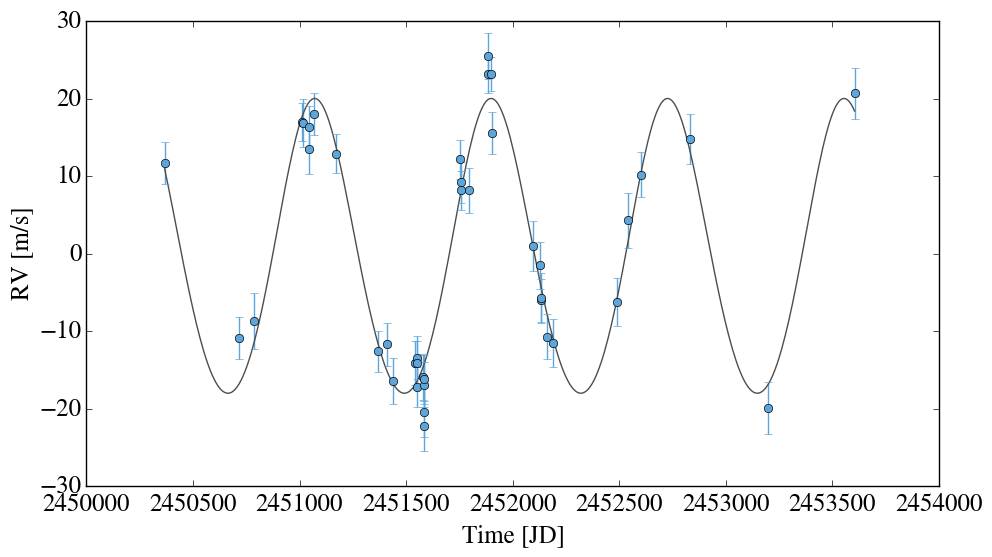

In [2]:
HD4208 = RVSystem(mstar=0.8)
HD4208.add_planet(per = 827.9233, mass = 0.75655, M = 266.68955, e=0.05685, pomega = 346.15898,i=90.)
HD4208.offsets = [7.559842e-02]
HD4208.path_to_data = "/Applications/Systemic/datafiles/"
HD4208.RV_data = ["HD4208_1_KECK.vels"]

HD4208.plot_RV()

In [4]:
print HD4208.calc_chi2(),HD4208.log_like()

47.390238683 -104.901089656


In [16]:
HD4208.rem_planet()

In [4]:
def min_test(planet_params,RVsys):
    per, mass, M, e, pomega, i, Omega = planet_params
    RVsys.rem_planet()
    RVsys.add_planet(per=per,mass=mass,M=M,e=e,pomega=pomega,i=i,Omega=Omega)
    return -RVsys.log_like()

In [5]:
def per_test(per,other_params,RVsys):
    mass, M, e, pomega, i, Omega = other_params
    RVsys.rem_planet()
    RVsys.add_planet(per=per,mass=mass,M=M,e=e,pomega=pomega,i=i,Omega=Omega)
    return -RVsys.log_like()

In [6]:
def per_mass_test(params,other_params,RVsys):
    per, mass = params
    M, e, pomega, i, Omega = other_params
    RVsys.rem_planet()
    RVsys.add_planet(per=per,mass=mass,M=M,e=e,pomega=pomega,i=i,Omega=Omega)
    return -RVsys.log_like()

In [54]:
other_params = [266.68955,0.05685,346.15898,90.,0]
params = [827,0.75]
per_mass_test(params,other_params,HD4208)

105.02535257636063

In [58]:
arr = [266.68955,0.05685,346.15898,90.,0]
result = op.minimize(per_mass_test,[500.,1.0], args=(arr,HD4208))
result.x

array([  4.87307755e+02,  -2.55930460e-01])

In [46]:
other_params = [0.75655,266.68955,0.05685,346.15898,90.,0]
per = 824.86438832
per_test(per,other_params,HD4208)

106.04030198536523

In [51]:
arr = [0.75655,266.68955,0.05685,346.15898,90.,0]
result = op.minimize(per_test,800., args=(arr,HD4208))
result.x

array([ 827.84309931])

In [36]:
planet_params = [829, 0.75655,266.68955,0.05685,346.15898,90.,0]
min_test(planet_params,HD4208)

TypeError: min_test() got an unexpected keyword argument 'method'

In [50]:
result = op.minimize(min_test, [700.,0.1,266.68955,0.05685,346.15898,90.,0], args=(HD4208))
result.x

array([  7.00000000e+02,   1.00000000e-01,   2.66689550e+02,
         5.68500000e-02,   3.46158980e+02,   9.00000000e+01,
         0.00000000e+00])

In [33]:
HD4208.planets[0].per

700.00000000000011

//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


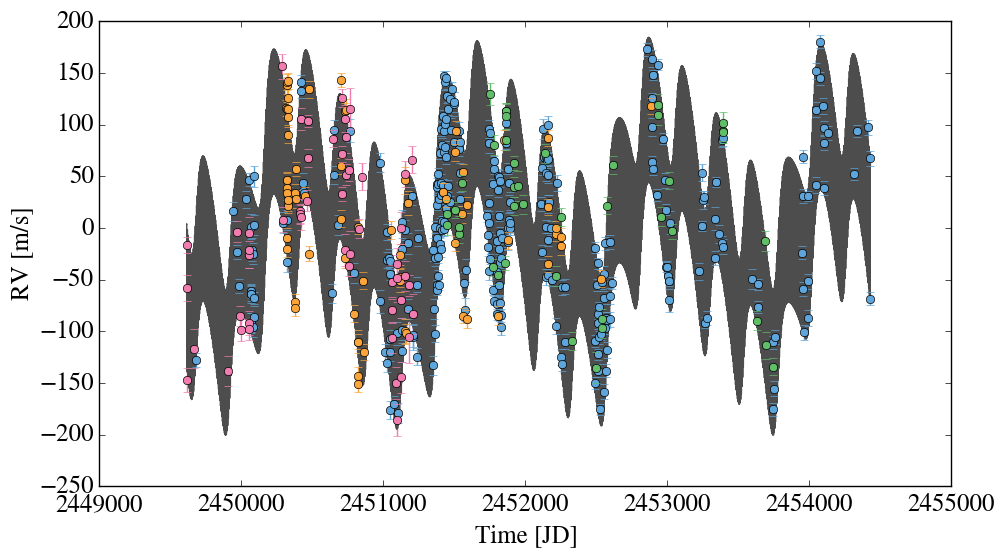

In [3]:
upsand = RVSystem(mstar = 1)


upsand.add_planet(per = 4.61709, mass = 0.57569, M = 196.78454, e=0.01495, pomega = 71.77111)
upsand.add_planet(per = 241.14235, mass = 1.64907, M = 124.57953, e=0.24479, pomega = 239.43484)
upsand.add_planet(per = 1275.11367, mass = 3.44773, M = 331.9481, e=0.27446, pomega = 265.75232)


upsand.RV_data = ['upsAnd_1_LICK.vels','upsAnd_2_ELODIE.vels','upsAnd_3_HJS.vels','upsAnd_4_TILLINGHAST.vels']
upsand.offsets = [2.785543e+00,-2.224642e+01,-1.68172e+01,8.712058e+00]
upsand.path_to_data = "/Applications/Systemic/datafiles/"

upsand.plot_RV()

emcee test on HD4208

In [7]:
HD4208 = RVSystem(mstar=0.8)
# HD4208.add_planet(per = 827.9233, mass = 0.75655, M = 266.68955, e=0.05685, pomega = 346.15898,i=90.)
HD4208.offsets = [7.559842e-02]
HD4208.path_to_data = "/Applications/Systemic/datafiles/"
HD4208.RV_data = ["HD4208_1_KECK.vels"]

In [8]:
def lnlike(params,other_params,RVsys):
    per, mass, e = params
    M, pomega, i, Omega = other_params
    RVsys.clear_planets()
    RVsys.add_planet(per=per,mass=mass,M=M,e=e,pomega=pomega,i=i,Omega=Omega)
    return RVsys.log_like()

In [9]:
def lnprior(params):
    per, mass, e = params
    if 100. < per < 1200. and 0.1 < mass < 10.0 and 0. < e < 0.5:
        return 0.0
    return -np.inf

In [10]:
def lnprob(params, other_params, RVsys):
    lp = lnprior(params)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(params, other_params, RVsys)

In [11]:
ndim, nwalkers = 3, 100
# start = [827.9233,0.75655,0.05685]
start = [800.,1.0,0.1]
pos = [start + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

In [12]:
params_fixed = [266.68955,346.15898,90.,0]
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(params_fixed,HD4208),threads=15)
# sampler.run_mcmc(pos, 500)

In [30]:
nsteps = 500
for i, result in enumerate(sampler.sample(pos, iterations=nsteps)):
    if (float(i+1)/nsteps*100.) % 10 == 0:
        print "%3i %%" %(float(i+1)/nsteps*100.)
        

 10 %
 20 %
 30 %
 40 %
 50 %
 60 %
 70 %
 80 %
 90 %
100 %


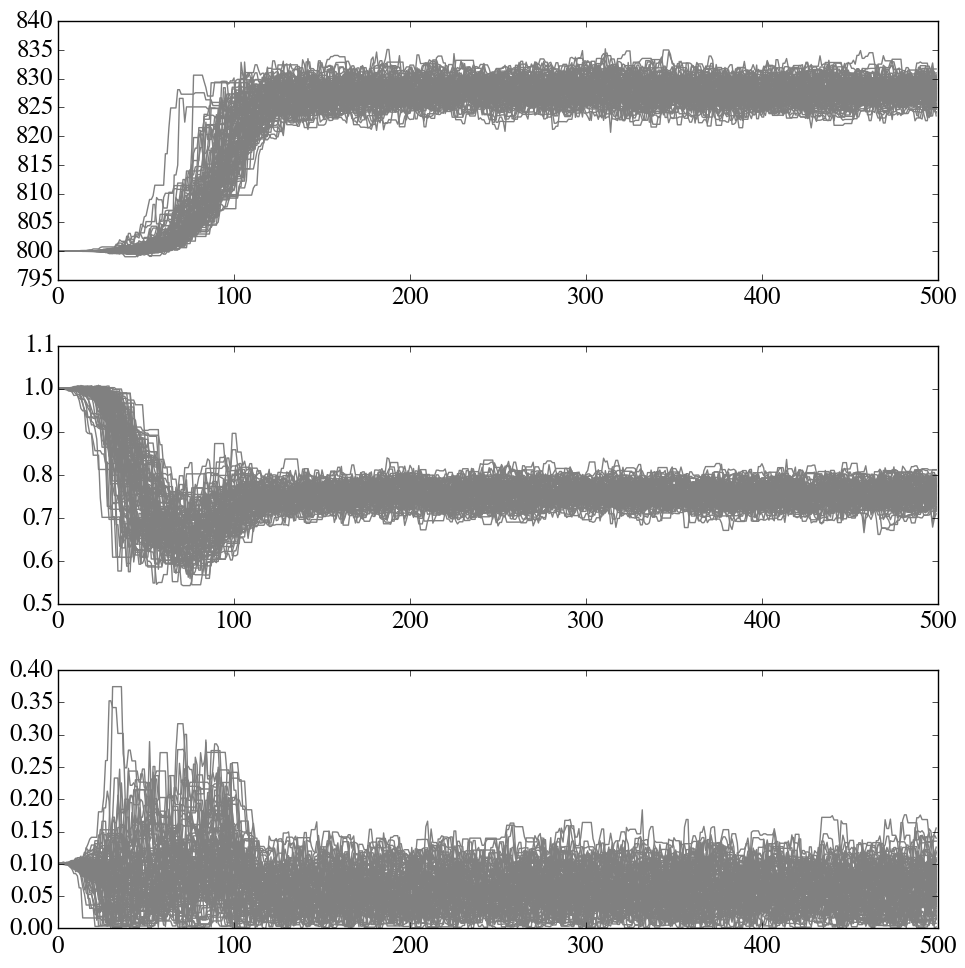

In [31]:
fig = plt.figure(1,figsize=(10,10))

for i in range(len(sampler.chain)):
    plt.subplot(311)
    plt.plot(sampler.chain[i,:,0],color='gray')
    
    plt.subplot(312)
    plt.plot(sampler.chain[i,:,1],color='gray')
    
    plt.subplot(313)
    plt.plot(sampler.chain[i,:,2],color='gray')
    
plt.tight_layout()

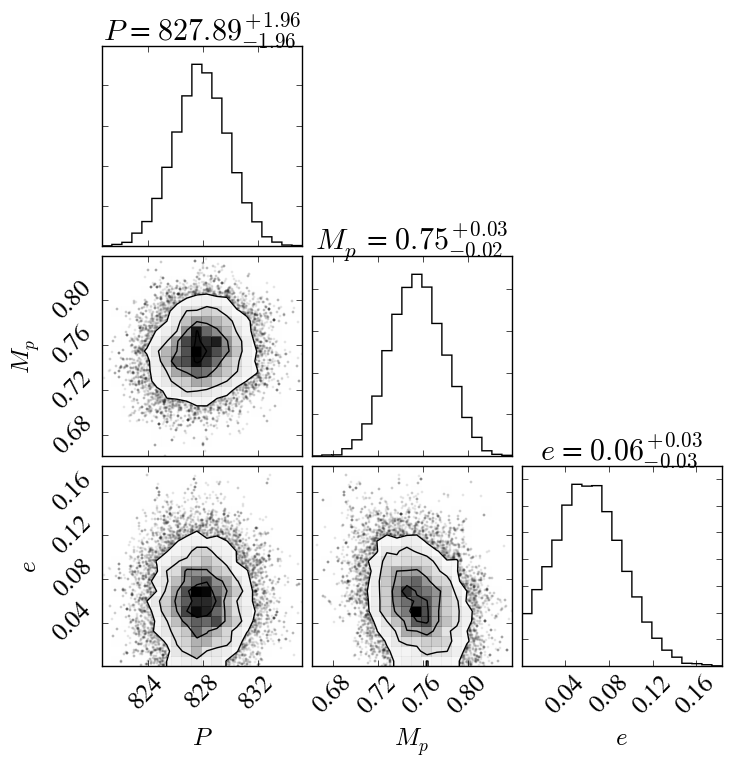

In [33]:
samples = sampler.chain[:, 200:, :].reshape((-1, ndim))
fig = corner.corner(samples, labels=["$P$", "$M_p$", "$e$"],show_titles=True
                      )

In [92]:
nsteps = 10000
for i in range(nsteps):
    if (float(i+1)/nsteps*100.) % 10 == 0:
        print "%3i %%" %(float(i+1)/nsteps*100.)

 10 %
 20 %
 30 %
 40 %
 50 %
 60 %
 70 %
 80 %
 90 %
100 %


In [ ]:
lnprop()